#Libraries



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

#References

[1] "OFDM RadarAlgorithms in Mobile Communication Networks", Martin Braun

[2] "Principles of Modern Radar", M. A. Richards, Ed.

[3] https://www.radartutorial.eu/01.basics/Range%20Resolution.en.html


#Constrains and requirements for radar and communication: subsystems of ISAC ([1] section 3.6.1)

##Short- or medium- Radar requirements

###delta_d: range resolution, its relation to the minimum OFDM signal BW

In [ ]:
# delta_d: range resolution, i.e 'the minimum distance two objects with the same relative velocity ... can still be distinguished'. 'relative velocity' = the doppler velocity
#1 delta_d is inversely proportional to the bandwidth:
## delta_d >= c0 / (2 * N * delta_f) ([2], [3])
## <=> N * delta_f >= c0 / (2 * delta_d)
# c0: speed of light
# N: number of sub-carriers in OFDM signal
# delta_f: sub-carrier spacing
# N * delta_f = BW of the OFDM signal

#2 Because: delta_d_min <= delta_d <= delta_d_max,
# c0 / (2 * delta_d_min) >= c0 / (2 * delta_d) >= c0 / (2 * delta_d_max)
# ?? (delta_d_max relates to the unambiguous detection range of the radar)

# Combine #1 and #2, if the delta_d_max (i.e maximum tolerable resolution) is known,
# the OFDM signal BW: N*delta_f >= c0 / (2 * delta_d_max).
# Equivalently, the minimum OFDM signal BW is c0 / (2 * delta_d_max)

###delta_vrel: velocity resolution, and its relation with the minimum OFDM signal frame duration

In [ ]:
# delta_vrel: velocity resolution, i.e 'the minimum velocity two objects with the same range ... can still be distinguished'. 'relative velocity'
# delta_vrel is inversely proportional to the frame duration (i.e M * T0):
## delta_vrel >= c0 / (2 * M * T0 * fc)
## <=> M * T0 >= c0 / (2 * delta_vrel * fc)
# c0: speed of light
# M: number of OFDM symbols in a OFDM signal
# T0: total duration of an OFDM symbol = T + TG
## T: duration of an OFDM symbol = 1/ delta_f
## TG: duration of cyclic prefix (i.e guard-time)
# fc: the center carrier's frequency
# M * T0 = frame duration of the OFDM signal

#4 Because: delta_vrel_min <= delta_vrel <= delta_vrel_max,
# c0 / (2 * delta_vrel_min * fc) >= c0 / (2 * delta_vrel * fc) >= c0 / (2 * delta_vrel_max * fc)
# ?? (delta_vrel_max relates to the unambiguous detection velocity of the radar)

# Combine #3 and #4, if the delta_d_max (i.e maximum tolerable resolution) is known,
# the OFDM signal BW: M * T0 >= c0 / (2 * delta_vrel_max * fc)
# Equivalently, the minimum OFDM signal frame duration is c0 / (2 * delta_vrel_max * fc)

###TG: OFDM symbol guard time, and its relation to d_max: the maximum detection range

In [ ]:
# TG: the OFDM symbol guard time. To preserve the orthogonality of the modulation symbols in time domain:
# TG >= 2 * d_max / c0


###delta_f: sub-carrier spacing and its relation with vrel_max

In [ ]:
# delta_f: the sub-carrier spacing. To mitigate the de-orthogonality in the frequency domain:
# delta_f  >> 2 * vrel_max * fc / c0 (3.141)


###(delta_f and d_max), and (T0 and vrel_max)

In [ ]:
# For relible radar operation:
## d_max <= d_uamb
## vrel_max <= vrel_unamb
# Therefore, (see the [1] section 3.2.2 Unambiguous ranges)
## delta_f <= c0 / (2 * d_max)
## T0 <= c0 / (2 * vrel_max * fc)


##Communication Requirements

References:

[1] Doppler shifts, Doppler spread, doppler power spectrum: http://www.wirelesscommunication.nl/reference/chaptr03/fading/doppler.htm


###The maximum excess delay τe

In [ ]:
# The maximum excess delay τe. Radio waves usually reach the
# receiver on a variety of paths, and arrive at different times. The
# time difference between the first and the last arrival of the same
# wave is described by τe.

###The Doppler spread BD

In [ ]:
# The Doppler spread BD. This describes the widening of the spectrum,
# caused by different Doppler shifts on each multipath.

# It is inversely proportional to the coherence time TC, which is the time
# over which the channel may be assumed constant

## BD = 1/TC

###the delay spread τDS

In [ ]:
# the delay spread τDS, which is an average
# value for the time difference of multipath propagation times.
# Paths are weighted by their attenuation, meaning that paths carrying
# more energy contribute more to τDS than paths with large
# fading.

# The delay spread is inversely proportional to the coherence
# bandwidth BC, which is the bandwidth over which a channel may
# be considered flat. (?? channel flat = channel constant)

## τDS = 1/BC

In [ ]:
# It must be emphasized that channels are not deterministic, and rarely
# static. The characteristics listed above are therefore expected values,
# derived from random channels.

###Avoiding ISI: TG > τe

In [ ]:
# ISI can simply be avoided by choosing the guard interval larger than the
# maximum excess delay of the channel

## TG > τe

###Avoiding ISI: BD ≪ delta_f ≪ BC

In [ ]:
# To avoid ICI, it is
# important that the sub-carrier spacing is chosen larger than the Doppler
# spread. However, to make sure that adjacent carriers from one OFDM
# symbol experience similar fading coefficients, delta_f must also be smaller
# than the coherence bandwidth of the channel

## BD ≪ delta_f ≪ BC

In [ ]:
# Similarly, the symbol duration T must be smaller than the coherence
# time TC of the channel

## T < TC
## <=> 1/ delta_f < TC (bcz T = 1/ delta_f)
## <=> delta_f > 1 / TC
## <=> delta_f > BD (bcz BD = 1/TC), which is already stated above

##Technical and Regulatory Constraints

###Available channel bandwidth (B), Center frequency (fC), Max transmit power (Pmax)

In [ ]:
# When implementing a system designed for commercial application, there
# are limits given by the law and the available technical capabilities

## the available bandwidth B
## choice of centre frequency fC
## the maximum transmit power Pmax are restricted

###PN: noise power

In [ ]:
# One figure of merit entirely dependant on the available hardware is the
# noise figure NF. Together with the bandwidth (B, mentioned above), it defines the noise power

## PN = NF · kB. Tn. N. delta_f
### NF: noise figure of the hardware
### kB: the Boltzmann constant (1.381×10−23 J/K, joules per kelvin)
### Tn: the noise temperature (K, kelvin) (i.e the temperature at which the hardware operates)

# sqrt(PN) = Vrms_noise amplitude
# Other references of noise temperature (actually, it is the same as noise spectral density of a resistor, a transistor. It has been defined in plenty of electronics course)
## [1] https://en.wikipedia.org/wiki/Noise_temperature

###SNRmin, and its relaion with (PRx, PN) or (pFA, N, M)

In [ ]:
# When Pmax, PN, fC, and B are given
# the minimum SNR required to detect a target is

## SNRmin = PRx/PN = ln(1 − (1 − pFA)**(1/N*M)).
# pFA: false alarm probability (which could be a requirement set by commercial application users)
# Note: x**y = x power to y

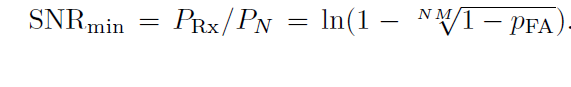

###d_max and SNRmin

In [ ]:
# When the SMRmin is determined so that the target could be detected,
# we could futher deduce what is the maximum distance from which the target could be detected (i.e d_max)

## SNRmin = PRx / PN
## = Pmax * GRx * (c0**2) * target_cross_section * N * M / [((4*pi)**3) * (fC**2) * PN * (d_max**4)]
# GRx: receiver gain (i.e antenna gain)

###ES/N0: On each sub-carrier, the modulation symbol energy per noise power density, and its relation to Eb/N0 (the bit enery per noise **power**)



In [ ]:
# Using the free space path loss equation, a receiver with distance dcomm from
# the transmitter will receive a total power of

## Pcomm = Pmax * (c0**2) * Grx / (((4*pi)**2) * (fC**2) * (dcomm**2))

In [ ]:
# On each sub-carrier, the modulation symbol energy per noise power density
# ES / N0 is thus

## ES / N0 = (Pcomm/ N) * T / (NF · kB. Tn) (3.152)
# T: duration of an OFDM symbol


# When choosing a modulation alphabet, it must be ensured that the
# Eb/N0 is large enough. As an example, assume that every modulation
# symbol shall represent one bit using BPSK modulation. In this case,
# both Eb/N0 = ES/N0 and (3.152) are used to assess whether the Eb/N0
# is large enough for a target bit error rate

#Example for determining parameter sets of ISAC in an commercial application (i.e KPI of ISAC for the commerical application) ([1] section 3.6.2)

In [ ]:
# The Figure 1 below shows requirements for radar and OFDM communication
# , which are 'Radar specifications' and 'Communication specifications'.
# The 'Suggested Parameters' are the results of analyzing the radar and communication specifications

**Figure 1**

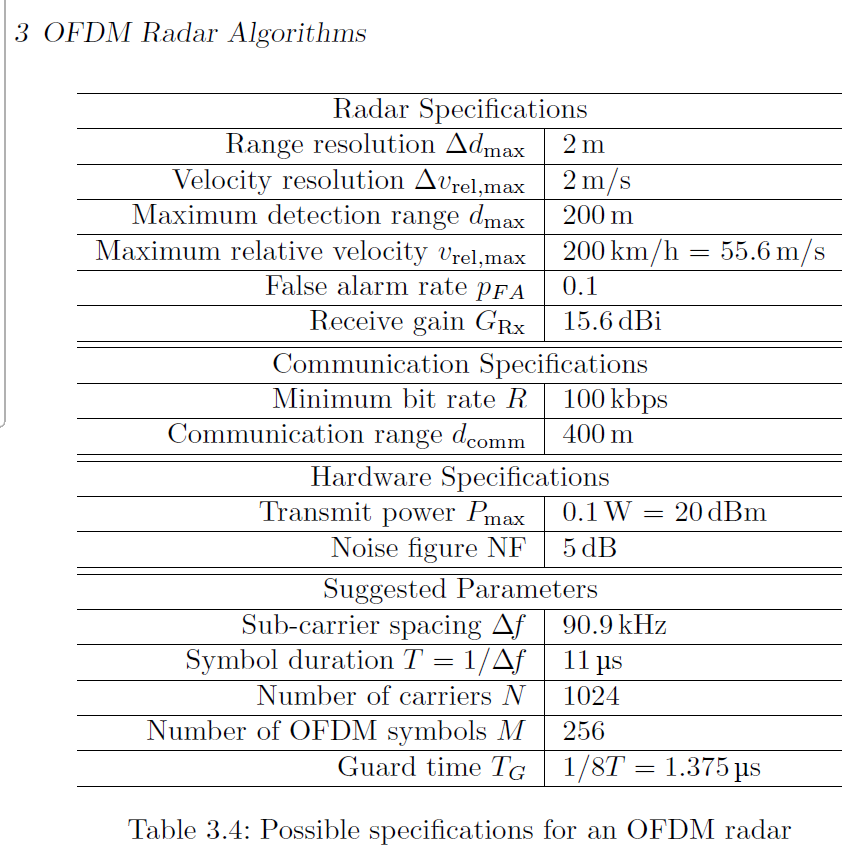

##EX1: 24 Ghz ISM-band for both inter-vehicule radar and communication.

##Radar requirements

###OFDM minimum Bandwidth

In [ ]:
# From Figure 1 above ('Radar specifications'):
c0 = 3e+8 # [m/s], speed of light
delta_d_max = 2 # [m]

In [ ]:
# The required minimum OFDM BW:
OFDM_BW_min = c0 / (2* delta_d_max) # [Hz]
print('OFDM min bandwidth (N * delta_f): ', OFDM_BW_min / 1e+6, ' [MHz]')

OFDM min bandwidth (N * delta_f):  75.0  [MHz]


###OFDM minimum frame duration

In [ ]:
# From Figure 1 above ('Radar specifications'):
delta_vrel_max = 2 # [m/s]
fC = 24e+9 # [Hz], because the system operates in 24 GHz ISM -> the center freq of this operation band is 24 GHz

In [ ]:
# The minimum OFDM frame duration:
OFDM_frame_duration_min = c0 / (2 * delta_vrel_max * fC) # [s]
print('OFDM min frame duration (M * T0): ', OFDM_frame_duration_min, ' [s]')

OFDM min frame duration (M * T0):  0.003125  [s]


###Sub-carrier spacing: delta_f

In [ ]:
# From Figure 1 above ('Radar specifications'):
vrel_max = 55.6 # [m/s]

In [ ]:
# the minimum delta_f (sub-carrier spacing)
delta_f_min = 2 * vrel_max * fC / c0 # [Hz]
print('min sub-carrier spacing: ', delta_f_min, ' [Hz]')

min sub-carrier spacing:  8896.0  [Hz]


In [ ]:
# It is advisable to chose the delta_f >= 10*delta_f_min
delta_f = 10*delta_f_min # [Hz]
print(delta_f, ' [Hz]')
# According to the Figure 1 'Suggested Parameters',
# the author rounded the delta_f up to 90.9 kHz
# Therefore, we follow the same
delta_f = 90.9e+3 # [Hz]
print('chosen sub-carrier spacing: ', delta_f, ' [Hz]')

88960.0  [Hz]
chosen sub-carrier spacing:  90900.0  [Hz]


###OFDM symbol duration (T) and its cyclic-prefix (TG)

In [ ]:
# OFDM symbol duration:
T = 1/delta_f # [s]
print('OFDM symbol duration without cyclic prefix (i.e TG: symbol guard time)', T, ' [s]')


OFDM symbol duration without cyclic prefix (i.e TG: symbol guard time) 1.1001100110011001e-05  [s]


In [ ]:
# From Figure 1 above ('Radar specifications'):
d_max = 200 # [m]

In [ ]:
# the minimum TG (OFDM symbol guard time):
TG_min = 2 * d_max / c0 # [s]

# compare TG_min with the rule of thumb in choosing TG = 1/8 * T
TG_rule_of_thumb = 1/8 * T # [s]

print('TG_min < TG_rule_of_thumb: ', TG_min < TG_rule_of_thumb)

TG following rule of thumb:  1.3751375137513752e-06  [s]
TG_min < TG_rule_of_thumb:  True


In [ ]:
# Therefore, we chose TG = TG_rule_of_thumb
TG = TG_rule_of_thumb # [s]

###Total number of sub-carriers (N) in OFDM bandwidth; and total number of OFDM symbols (M) in a OFDM frame duration

In [ ]:
# The min N (total number of sub-carriers)
N_min = OFDM_BW_min / delta_f
print('the min total number of sub-carriers: ', N_min)

# The min M (total number of OFDM symbols in a OFDM frame)
M_min = OFDM_frame_duration_min / (T + TG)
print('the min total number of OFDM symbols in a OFDM frame: ', M_min)

the min total number of sub-carriers:  825.0825082508251
total number of OFDM symbols in a OFDM frame:  252.5


In [ ]:
# From N_min, M_min, we can say: in Figure 1 'Suggested Parameters',
# the chosen N = 1024 and M = 256 are valid
N = 1024
M = 256

##Communication requirements

In [ ]:
# To prove that the communication requirements
# are fulfilled, knowledge of the inter-vehicle channels at 24GHz
# is required, which can only be reliably obtained by elaborate measurement
# campaigns.

In [ ]:
# the table 3.5 shows the worst cases channel characteristics in different scenarios (urban, rural, highway).
# Except for τe = 1.5 us, all the channel characteristics belong to 'highway' scenario

**table 3.5**

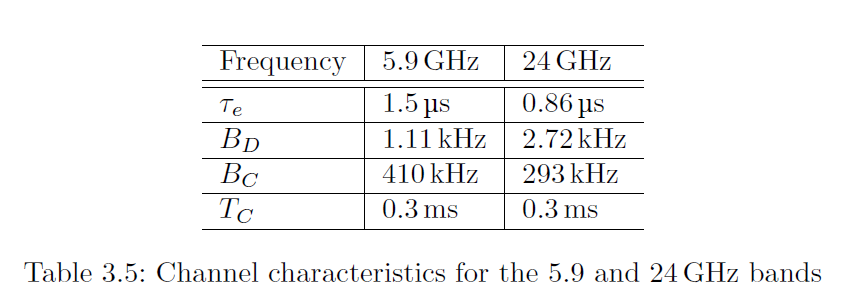

###Communication channel characteristics

In [ ]:
# If the values for 24GHz are used,
τe = 1.5e-6 # [s]
BD = 1.11e+3 # [Hz]
BC = 410e+3 # [Hz]
TC = 0.3e-3 # [s]

print('TG < τe :', TG < τe)
print('BD << delta_f: ', BD < delta_f)
print('1/TC < delta_f: ', (1/TC) <  delta_f)

TG < τe : True
BD << delta_f:  True
1/TC < delta_f:  True


In [ ]:
# Therefore, the communication requirements are also met by
# the 'Suggested Parameters' in Figure 1

##Technical and Regulation requirements

###Regulations

In [ ]:
# Regulation differs from region to region. In Germany, a
# bandwidth of 250MHz is available for this kind of application [111],
# which is much larger than the OFDM radar bandwidth of 93.09MHz,
# with a maximum EIRP (= PTx * GTx) of 20 dBm (100 milliwatts), which shall be used
# for Pmax.
Pmax = 1e-3 * 10**(20/10) # [W]
print(Pmax, '[W]')

# from the Figure 1, 'radar specfication':
GRx = 10*np.log10(15.6/10)

0.1 [W]


###Radar and Communication Ranges

####Radar range

In [ ]:
# From the Figure 1 'Communication Specification'
kB = 1.381e-23 # [J/K]
NF_dB = 5 # [dB], NF_dB = 10 * log10(NF)
NF = 10**(NF_dB/10)
Tn = 293 # [K], room temperature (20 degree)

In [ ]:
# With the given noise figure and
# bandwidth, the noise power is
PN = kB * Tn * NF * N * delta_f # [W]
print('Noise Power: ', PN, '[W] or ', 10*np.log10(PN/1e-3), '[dBm]')

Noise Power:  1.1910366862217449e-12 [W] or  -89.2407486120548 [dBm]


In [ ]:
# From the Figure 1 'Communication Specification'
pFA = 0.1

In [ ]:
# SNRmin:
SNRmin = abs(np.log(1- (1 - pFA)**(1/(N*M))))
# The min PRx for detection and communication:
PRx_min = PN * SNRmin
print('min required PRx: ', PRx_min, '[W] or ', 10*np.log10(PRx_min/1e-3), '[dBm]')

min required PRx:  1.754041726155832e-11 [W] or  -77.55960079599576 [dBm]


In [ ]:
# assume target_cross_section:
target_cross_section = 10 # [m^2]

# Thus, the max d_max of the specified target:
dmax = ((Pmax * GRx * (c0**2) * target_cross_section * N * M) / (((4*np.pi)**3) * (fC**2) * PN * SNRmin))**(1/4)
print('max detection range of a target with radar cross-section 10 m^2: ', dmax, ' [m]')

max detection range of a target with radar cross-section 10 m^2:  218.33934708160774  [m]


In [ ]:
# Compare dmax above with the d_max in Figure 1 'Radar specifications': we need dmax >= d_max
print('dmax computed > d_max required: ', dmax > d_max)

dmax computed > d_max required:  True


####Communication range

In [ ]:
# From the Figure 1 'Communication Specification'
dcomm = 400 # [m]

In [ ]:
# Each sub-carrier: ES/N0
Pcomm = Pmax * (c0**2) * GRx / (((4*np.pi)**2) * (fC**2) * (dcomm**2))
ES_over_N0 = (Pcomm/ N) * T / (NF * kB * Tn)
print('per sub-carrier, the modulation symbol energy per noise power: ', 10*np.log10(ES_over_N0), ' [dB]')

per sub-carrier, the modulation symbol energy per noise power:  0.011927700793955758  [dB]


In [ ]:
# If BPSK was used (every sub-carrier transports one bit), the gross bit
# rate (not considering pilot symbols) would be
Gross_bit_rate = N/(T+TG) # [bit / s = bps]
print(Gross_bit_rate / 1e+6, '[Mbps]')
# Compare with the 'communication specification' in Figure 1,
min_gross_bit_Rate = 100e+3 # [bps]
print('Gross_bit_rate > min_gross_bit_Rate: ', Gross_bit_rate > min_gross_bit_Rate)

# and
Eb_over_N0 = ES_over_N0

82.7392 [Mbps]
Gross_bit_rate > min_gross_bit_Rate:  True


####BER

reference:

[1] Q-functions:

[1.1] Cyclic Bit Loading for Adaptive OFDM in
Narrowband Power Line Communications, Cornelius Kaiser, Norbert Mitschke and Klaus Dostert

[1.2] https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html

In [ ]:
def Q(x):
  return np.exp(-x**2/2)

# Caluclate the BER: Q(sqrt(2*(Eb/N0)))
inf = 30
BER= integrate.quad(Q, 2*Eb_over_N0, inf) * 1/(np.sqrt(2*np.pi))

print(BER[0])

0.02245478585446027


In [ ]:
# Such a BER makes the system unusable, especially in an environment
# where the communication can be crucial for safety

In [ ]:
# To summarize, it could be confirmed that 'Suggested parameters' in Figure 1
# is suitable for OFDM radar. The parametrization also allows for communication,
# but reliable data transmission is only possible if additional
# mechanisms, such as encoding, are in place.